# Impact of COVID-19 to the economy of Kenya (Statistical analysis)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. OXFORD COVID-19 Government response data

In [2]:
df1 = pd.read_csv('oxford-government-response.csv')
pd.set_option('display.max_columns', None)
df1.head(5)

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,2020-01-01,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303969 entries, 0 to 303968
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   date                                303969 non-null  object 
 1   location_key                        303053 non-null  object 
 2   school_closing                      302415 non-null  float64
 3   workplace_closing                   302243 non-null  float64
 4   cancel_public_events                302068 non-null  float64
 5   restrictions_on_gatherings          301981 non-null  float64
 6   public_transport_closing            301845 non-null  float64
 7   stay_at_home_requirements           302074 non-null  float64
 8   restrictions_on_internal_movement   302034 non-null  float64
 9   international_travel_controls       300241 non-null  float64
 10  income_support                      286963 non-null  float64
 11  debt_relief               

In [4]:
#Filtering to Kenya
df1 = df1[df1['location_key'] == 'KE']
df1.loc[:, 'date'] = pd.to_datetime(df1['date'])
df1.head()

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
164449,2020-01-01 00:00:00,KE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164450,2020-01-02 00:00:00,KE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164451,2020-01-03 00:00:00,KE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164452,2020-01-04 00:00:00,KE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164453,2020-01-05 00:00:00,KE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Cleaning
columns_of_interest = [
    'date',
    'workplace_closing',
    'stay_at_home_requirements',
    'public_transport_closing',
    'international_travel_controls',
    'fiscal_measures',
    'international_support',
    'stringency_index'
]

df1 = df1[columns_of_interest]

df1['date'] = pd.to_datetime(df1['date'])
df1['quarter'] = df1['date'].dt.to_period('Q')
df1 = df1.drop(columns='date')
df1 = df1.groupby('quarter').mean().reset_index()
df1['quarter'] = df1['quarter'].astype('str')
df1

,quarter,workplace_closing,stay_at_home_requirements,public_transport_closing,international_travel_controls,fiscal_measures,international_support,stringency_index
0,2020Q1,0.274725,0.186813,0.131868,1.285714,0.000000e+00,0.0,17.736374
1,2020Q2,2.000000,2.945055,1.000000,4.000000,5.700244e+06,0.0,88.024615
2,2020Q3,1.978261,2.065217,0.978261,2.673913,0.000000e+00,0.0,74.486413
3,2020Q4,1.000000,2.000000,0.336957,1.336957,1.293478e+07,0.0,51.077826
4,2021Q1,1.066667,2.000000,1.000000,1.000000,0.000000e+00,0.0,52.594444
5,2021Q2,1.351648,2.000000,0.736264,2.560440,0.000000e+00,0.0,70.683846
6,2021Q3,2.000000,2.000000,0.000000,1.282609,0.000000e+00,0.0,57.885435
7,2021Q4,2.000000,1.206522,0.239130,1.978261,NaN,NaN,43.575652
8,2022Q1,2.000000,1.000000,1.622222,3.900000,NaN,NaN,55.404778
9,2022Q2,1.505495,0.736264,0.000000,4.000000,NaN,NaN,48.688791


## 2. New COVID-19 cases and deaths in Kenya

In [12]:
df2 = pd.read_csv('covid19_cases_and_deaths_in_kenya.csv')

In [13]:
df2.head()

,date_reported,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,year_month
0,2020-01-05,NaN,0,NaN,0,2020,1,January-2020
1,2020-01-12,NaN,0,NaN,0,2020,1,January-2020
2,2020-01-19,NaN,0,NaN,0,2020,1,January-2020
3,2020-01-26,NaN,0,NaN,0,2020,1,January-2020
4,2020-02-02,NaN,0,NaN,0,2020,2,February-2020


In [14]:
#Cleaning
df2['date_reported'] = pd.to_datetime(df2['date_reported'])
df2['quarter'] = df2['date_reported'].dt.to_period('Q')
df2 = df2.drop(columns='date_reported')
df2 = df2.groupby('quarter')[['new_cases', 'new_deaths']].sum().reset_index()
df2['quarter'] = df2['quarter'].astype('str')
df2

,quarter,new_cases,new_deaths
0,2020Q1,38.0,4.0
1,2020Q2,5773.0,137.0
2,2020Q3,32060.0,548.0
3,2020Q4,57972.0,966.0
4,2021Q1,33487.0,449.0
5,2021Q2,53063.0,1470.0
6,2021Q3,65999.0,1522.0
7,2021Q4,32966.0,263.0
8,2022Q1,42007.0,288.0
9,2022Q2,8601.0,4.0


## 3. Quarterly GDP (Kenya)

In [15]:
df3 = pd.read_csv('Kenya- Quarterly GDP.csv')
df3.head()

,Year,2009,2009_1,2009_2,2009_3,2010,2010_4,2010_5,2010_6,2011,2011_7,2011_8,2011_9,2012,2012_10,2012_11,2012_12,2013,2013_13,2013_14,2013_15,2014,2014_16,2014_17,2014_18,2015,2015_19,2015_20,2015_21,2016,2016_22,2016_23,2016_24,2017,2017_25,2017_26,2017_27,2018,2018_28,2018_29,2018_30,2019,2019_31,2019_32,2019_33,2020,2020_34,2020_35,2020_36,2021,2021_37,2021_38,2021_39,2022,2022_40,2022_41,2022_42,2023*,2023*_43,2023*_44,2023*_45,2024*
0,Quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1
1,GDP at market prices,1335552,1325092,1335249,1365569,1434652,1438303,1435568,1484991,1518671,1515704,1513683,1542149,1578240,1588229,1589858,1612121,1634472,1663371,1648735,1663734,1713837,1761200,1732574,1734546,1796031,1849061,1814660,1827273,1865055,1918939,1895281,1914788,1965433,1981729,1956820,1981540,"2,067,442","2,101,774","2,060,536","2,101,139","2,167,476","2,227,491","2,163,432","2,198,547","2,266,843","2,136,855","2,086,577","2,242,786","2,320,156","2,357,637","2,281,713","2,436,437","2,458,406","2,473,475","2,386,457","2,534,246","2,591,391","2,612,386","2,530,285",2665918,2720702
2,GDP (seasonally adjusted),1314844,1326084,1348808,1371285,1414539,1438482,1449582,1490081,1501464,1512220,1527277,1548587,1565450,1579088,1603190,1620971,1626387,1646446,1661933,1677156,1707778,1736082,1748492,1751490,1789015,1819036,1832748,1848329,1855737,1888081,1916483,1936414,1951336,1949525,1981881,2005543,"2,048,712","2,066,812","2,093,548","2,123,748","2,145,709","2,188,890","2,205,908","2,217,579","2,240,745","2,100,389","2,136,597","2,255,178","2,288,716","2,320,419","2,345,996","2,442,212","2,419,735","2,437,935","2,462,405","2,533,666","2,553,317","2,580,473","2,615,247",2650620,2680942


In [16]:
df3.set_index('Year', inplace=True)
df3 = df3.transpose()
df3.tail()

Year,Quarter,GDP at market prices,GDP (seasonally adjusted)
2023*,Q1,"2,591,391","2,553,317"
2023*_43,Q2,"2,612,386","2,580,473"
2023*_44,Q3,"2,530,285","2,615,247"
2023*_45,Q4,2665918,2650620
2024*,Q1,2720702,2680942


In [17]:
df3['Year']=df3.index
df3['Year'] = df3['Year'].str.extract(r'(\d{4})')
df3['quarter'] = df3['Year'].astype(str) + df3['Quarter']
df3.head()

Year,Quarter,GDP at market prices,GDP (seasonally adjusted),Year,quarter
2009,Q1,1335552,1314844,2009,2009Q1
2009_1,Q2,1325092,1326084,2009,2009Q2
2009_2,Q3,1335249,1348808,2009,2009Q3
2009_3,Q4,1365569,1371285,2009,2009Q4
2010,Q1,1434652,1414539,2010,2010Q1


In [18]:
df3=df3.reset_index().set_index('Year').drop(columns=['index', 'Quarter'])
df3.head()

Year,GDP at market prices,GDP (seasonally adjusted),quarter
Year,,,
2009,1335552,1314844,2009Q1
2009,1325092,1326084,2009Q2
2009,1335249,1348808,2009Q3
2009,1365569,1371285,2009Q4
2010,1434652,1414539,2010Q1


In [19]:
quarters_to_keep = [
    '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', 
    '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', 
    '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q4'
]
df3 = df3[df3['quarter'].isin(quarters_to_keep)]
df3

Year,GDP at market prices,GDP (seasonally adjusted),quarter
Year,,,
2018,"2,060,536","2,093,548",2018Q3
2018,"2,101,139","2,123,748",2018Q4
2019,"2,167,476","2,145,709",2019Q1
2019,"2,227,491","2,188,890",2019Q2
2019,"2,163,432","2,205,908",2019Q3
2019,"2,198,547","2,217,579",2019Q4
2020,"2,266,843","2,240,745",2020Q1
2020,"2,136,855","2,100,389",2020Q2
2020,"2,086,577","2,136,597",2020Q3


In [20]:
df3['GDP at market prices'] = df3['GDP at market prices'].str.replace(',', '').astype(float)
df3['GDP (seasonally adjusted)'] = df3['GDP (seasonally adjusted)'].str.replace(',', '').astype(float)
df3

Year,GDP at market prices,GDP (seasonally adjusted),quarter
Year,,,
2018,2060536.0,2093548.0,2018Q3
2018,2101139.0,2123748.0,2018Q4
2019,2167476.0,2145709.0,2019Q1
2019,2227491.0,2188890.0,2019Q2
2019,2163432.0,2205908.0,2019Q3
2019,2198547.0,2217579.0,2019Q4
2020,2266843.0,2240745.0,2020Q1
2020,2136855.0,2100389.0,2020Q2
2020,2086577.0,2136597.0,2020Q3


## 4. Inflation rates

In [21]:
df4= pd.read_csv('Inflation Rates.csv')
df4

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2024,June,4.64,6.22
1,2024,May,6.49,5.10
2,2024,April,6.73,5.00
3,2024,March,6.97,5.70
4,2024,February,7.26,6.31
...,...,...,...,...
230,2005,May,14.61,14.78
231,2005,April,13.76,16.02
232,2005,March,13.07,14.15
233,2005,February,12.60,13.94


In [22]:
#Cleaning
df4['Month-Year'] = pd.to_datetime(df4['Month'] + ' ' + df4['Year'].astype(str), format='%B %Y')
df4['quarter'] = df4['Month-Year'].dt.to_period('Q').astype('str')
df4 = df4.groupby('quarter')['Annual Average Inflation'].mean().reset_index()
df4 = df4.sort_values(by='quarter')

quarters_to_keep = [
    '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', 
    '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', 
    '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q4'
]

df4 = df4[df4['quarter'].isin(quarters_to_keep)]
df4

,quarter,Annual Average Inflation
54,2018Q3,4.703333
55,2018Q4,4.603333
56,2019Q1,4.666667
57,2019Q2,5.005000
58,2019Q3,5.320000
59,2019Q4,5.193333
60,2020Q1,5.616667
61,2020Q2,6.123333
62,2020Q3,5.890000
63,2020Q4,5.536667


## 5. Foreign trade (Trade balance)

In [23]:
df5 = pd.read_csv('Foreign Trade Summary (Ksh Million).csv')
df5.head()

,Year,Month,Commercial Imports,Government Imports,Total,Domestic FOB,Re-Exports,Total FOB,Trade Balance
0,2023,December,"243,968.74","15,142.37","259,111.12","79,734.51","9,242.48","88,976.99","-170,134.13"
1,2023,November,"214,150.59","5,513.61","219,664.19","77,463.74","6,775.04","84,238.78","-135,425.41"
2,2023,October,"237,869.41","3,013.06","240,882.46","74,825.25","9,351.02","84,176.27","-156,706.19"
3,2023,September,"211,224.24","4,372.59","215,596.83","74,273.37","16,914.81","91,188.18","-124,408.65"
4,2023,August,"235,121.16","3,701.48","238,822.64","82,881.06","11,388.55","94,269.61","-144,553.03"


In [24]:
df5['Month-Year'] = pd.to_datetime(df5['Month'] + ' ' + df5['Year'].astype(str), format='%B %Y')
df5['quarter'] = df5['Month-Year'].dt.to_period('Q').astype('str')
df5 = df5.sort_values(by='quarter')
df5['Trade Balance'] = df5['Trade Balance'].replace(',', '', regex=True).astype(float)
df5 = df5.groupby('quarter')['Trade Balance'].mean().reset_index()

quarters_to_keep = [
    '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', 
    '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', 
    '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q4'
]

df5 = df5[df5['quarter'].isin(quarters_to_keep)]
df5

,quarter,Trade Balance
80,2018Q3,-93700.486667
81,2018Q4,-95713.176667
82,2019Q1,-88856.090000
83,2019Q2,-102986.883333
84,2019Q3,-100701.916667
85,2019Q4,-109315.983333
86,2020Q1,-82611.786667
87,2020Q2,-69620.250000
88,2020Q3,-86086.876667
89,2020Q4,-94749.553333


## 6. Unemployment rate

In [25]:
df6 = pd.read_csv('Unemployment rates.csv')
df6

,year,quarter,unemployment_rate
0,2017,Q1,3.540
1,2017,Q2,3.540
2,2017,Q3,3.540
3,2017,Q4,3.540
4,2018,Q1,4.284
5,2018,Q2,4.284
6,2018,Q3,4.284
7,2018,Q4,4.284
8,2019,Q1,5.014
9,2019,Q2,5.014


In [26]:
#Cleaning
df6['quarter'] = df6['year'].astype(str) + df6['quarter']
df6= df6.drop(columns = ['year'])
quarters_to_keep = [
    '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', 
    '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', 
    '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q4'
]
df6 = df6[df6['quarter'].isin(quarters_to_keep)]
df6

,quarter,unemployment_rate
6,2018Q3,4.284
7,2018Q4,4.284
8,2019Q1,5.014
9,2019Q2,5.014
10,2019Q3,5.014
11,2019Q4,5.014
12,2020Q1,5.621
13,2020Q2,5.621
14,2020Q3,5.621
15,2020Q4,5.621


## 7. Government revenue & expenditure

In [27]:
df7 = pd.read_csv('Revenue and Expenditure.csv')
df7.head()

,Year,Month,Total revenue,Total expenditure
0,1999,9,"41,314.00","44,478.00"
1,1999,12,"86,329.00","86,435.00"
2,2000,3,"130,592.00","137,761.00"
3,2000,6,"178,443.00","175,119.00"
4,2000,7,"11,615.00","15,418.00"


In [28]:
df7['Year-Month'] = pd.to_datetime(df7[['Year', 'Month']].assign(DAY=1))
df7['quarter'] = df7['Year-Month'].dt.to_period('Q').astype('str')
df7['Total revenue'] = df7['Total revenue'].replace(',', '', regex=True).astype(float)
df7['Total expenditure'] = df7['Total expenditure'].replace(',', '', regex=True).astype(float)
df7 = df7.groupby('quarter')[['Total revenue', 'Total expenditure']].sum().reset_index()

quarters_to_keep = [
    '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', 
    '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', 
    '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q4'
]
df7 = df7.loc[df7['quarter'].isin(quarters_to_keep)]

df7

,quarter,Total revenue,Total expenditure
76,2018Q3,7.032567e+05,7.970798e+05
77,2018Q4,1.903462e+06,2.547359e+06
78,2019Q1,3.114818e+06,4.402151e+06
79,2019Q2,4.472234e+06,6.315951e+06
80,2019Q3,7.756460e+05,9.124865e+05
81,2019Q4,2.222808e+06,2.827697e+06
82,2020Q1,3.569525e+06,4.919552e+06
83,2020Q2,4.785452e+06,6.715058e+06
84,2020Q3,6.957913e+05,9.384654e+05
85,2020Q4,1.940047e+06,2.868030e+06


## Dataset merging

In [29]:
df8 = df3.merge(df2, on='quarter', how='left')
df9 = df8.merge(df1, on='quarter', how='left')
df10 = df9.merge(df4, on='quarter', how='left')
df11 = df10.merge(df5, on='quarter', how='left')
df12 = df11.merge(df6, on='quarter', how='left')
df13 = df12.merge(df7, on='quarter', how='left')
df13.head()

,GDP at market prices,GDP (seasonally adjusted),quarter,new_cases,new_deaths,workplace_closing,stay_at_home_requirements,public_transport_closing,international_travel_controls,fiscal_measures,international_support,stringency_index,Annual Average Inflation,Trade Balance,unemployment_rate,Total revenue,Total expenditure
0,2060536.0,2093548.0,2018Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.703333,-93700.486667,4.284,7.032567e+05,7.970798e+05
1,2101139.0,2123748.0,2018Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.603333,-95713.176667,4.284,1.903462e+06,2.547359e+06
2,2167476.0,2145709.0,2019Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.666667,-88856.090000,5.014,3.114818e+06,4.402151e+06
3,2227491.0,2188890.0,2019Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.005000,-102986.883333,5.014,4.472234e+06,6.315951e+06
4,2163432.0,2205908.0,2019Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.320000,-100701.916667,5.014,7.756460e+05,9.124865e+05


# Preprocessing

## 1. Cleaning column names

In [30]:
df13.columns = df13.columns.str.replace('_', ' ').str.title()
columns = ['Quarter'] + [col for col in df13.columns if col != 'Quarter']
df13 = df13[columns]

df13.rename(columns={
    'Gdp At Market Prices': 'GDP at Market Prices',
    'Gdp (Seasonally Adjusted)': 'GDP (Seasonally Adjusted)',
    'Total Revenue': 'Government Revenue',
    'Total Expenditure': 'Government Expenditure'
}, inplace=True)

df13.columns

Index(['Quarter', 'GDP at Market Prices', 'GDP (Seasonally Adjusted)',
       'New Cases', 'New Deaths', 'Workplace Closing',
       'Stay At Home Requirements', 'Public Transport Closing',
       'International Travel Controls', 'Fiscal Measures',
       'International Support', 'Stringency Index', 'Annual Average Inflation',
       'Trade Balance', 'Unemployment Rate', 'Government Revenue',
       'Government Expenditure'],
      dtype='object')

In [31]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Quarter                        19 non-null     object 
 1   GDP at Market Prices           19 non-null     float64
 2   GDP (Seasonally Adjusted)      19 non-null     float64
 3   New Cases                      13 non-null     float64
 4   New Deaths                     13 non-null     float64
 5   Workplace Closing              11 non-null     float64
 6   Stay At Home Requirements      11 non-null     float64
 7   Public Transport Closing       11 non-null     float64
 8   International Travel Controls  11 non-null     float64
 9   Fiscal Measures                7 non-null      float64
 10  International Support          7 non-null      float64
 11  Stringency Index               11 non-null     float64
 12  Annual Average Inflation       19 non-null     float

## 2. Filtering columns

In [32]:
columns_of_interest = [
    'Quarter', 'New Cases', 'New Deaths', 'Workplace Closing', 'Stay At Home Requirements', 
    'Public Transport Closing', 'Fiscal Measures', 'Stringency Index', 'Annual Average Inflation', 
    'Trade Balance', 'Unemployment Rate', 'GDP at Market Prices', 'Government Revenue', 'Government Expenditure'
]

df_final = df13[columns_of_interest]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quarter                    19 non-null     object 
 1   New Cases                  13 non-null     float64
 2   New Deaths                 13 non-null     float64
 3   Workplace Closing          11 non-null     float64
 4   Stay At Home Requirements  11 non-null     float64
 5   Public Transport Closing   11 non-null     float64
 6   Fiscal Measures            7 non-null      float64
 7   Stringency Index           11 non-null     float64
 8   Annual Average Inflation   19 non-null     float64
 9   Trade Balance              19 non-null     float64
 10  Unemployment Rate          19 non-null     float64
 11  GDP at Market Prices       19 non-null     float64
 12  Government Revenue         19 non-null     float64
 13  Government Expenditure     19 non-null     float64
d

## 3. Filling null values

In [33]:
df_final = df_final.fillna(0)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quarter                    19 non-null     object 
 1   New Cases                  19 non-null     float64
 2   New Deaths                 19 non-null     float64
 3   Workplace Closing          19 non-null     float64
 4   Stay At Home Requirements  19 non-null     float64
 5   Public Transport Closing   19 non-null     float64
 6   Fiscal Measures            19 non-null     float64
 7   Stringency Index           19 non-null     float64
 8   Annual Average Inflation   19 non-null     float64
 9   Trade Balance              19 non-null     float64
 10  Unemployment Rate          19 non-null     float64
 11  GDP at Market Prices       19 non-null     float64
 12  Government Revenue         19 non-null     float64
 13  Government Expenditure     19 non-null     float64
d

In [34]:
df_final['GDP at Market Prices'] = pd.to_numeric(df_final['GDP at Market Prices'], errors='coerce')

# EDA

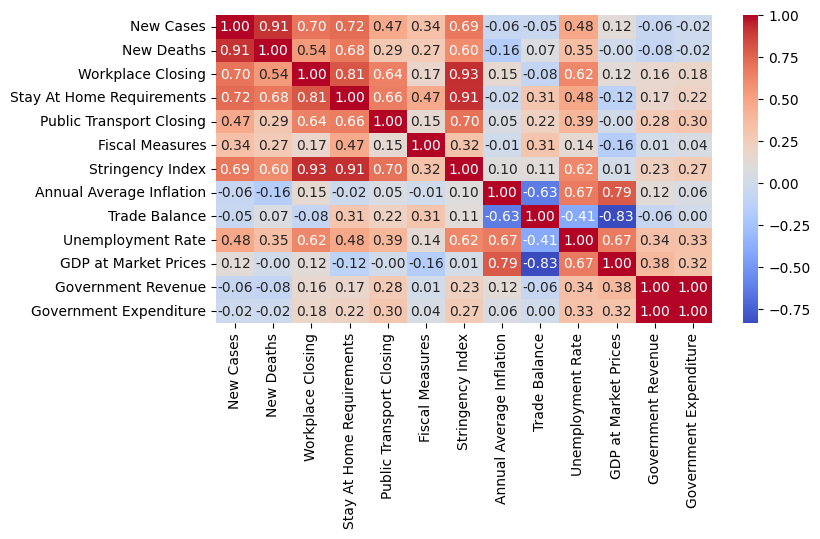

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(df_final.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Econometric analysis

In [36]:
#Statsmodels library
import statsmodels.api as sm

In [37]:
df_final

,Quarter,New Cases,New Deaths,Workplace Closing,Stay At Home Requirements,Public Transport Closing,Fiscal Measures,Stringency Index,Annual Average Inflation,Trade Balance,Unemployment Rate,GDP at Market Prices,Government Revenue,Government Expenditure
0,2018Q3,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.703333,-93700.486667,4.284,2060536.0,7.032567e+05,7.970798e+05
1,2018Q4,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.603333,-95713.176667,4.284,2101139.0,1.903462e+06,2.547359e+06
2,2019Q1,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.666667,-88856.090000,5.014,2167476.0,3.114818e+06,4.402151e+06
3,2019Q2,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.005000,-102986.883333,5.014,2227491.0,4.472234e+06,6.315951e+06
4,2019Q3,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.320000,-100701.916667,5.014,2163432.0,7.756460e+05,9.124865e+05
5,2019Q4,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.193333,-109315.983333,5.014,2198547.0,2.222808e+06,2.827697e+06
6,2020Q1,38.0,4.0,0.274725,0.186813,0.131868,0.000000e+00,17.736374,5.616667,-82611.786667,5.621,2266843.0,3.569525e+06,4.919552e+06
7,2020Q2,5773.0,137.0,2.000000,2.945055,1.000000,5.700244e+06,88.024615,6.123333,-69620.250000,5.621,2136855.0,4.785452e+06,6.715058e+06
8,2020Q3,32060.0,548.0,1.978261,2.065217,0.978261,0.000000e+00,74.486413,5.890000,-86086.876667,5.621,2086577.0,6.957913e+05,9.384654e+05
9,2020Q4,57972.0,966.0,1.000000,2.000000,0.336957,1.293478e+07,51.077826,5.536667,-94749.553333,5.621,2242786.0,1.940047e+06,2.868030e+06


In [38]:
quarters = [
    '2020Q1', '2020Q2', '2020Q3', '2020Q4',
    '2021Q1', '2021Q2', '2021Q3', '2021Q4',
    '2022Q1', '2022Q2', '2022Q3', '2022Q4',
    '2023Q1', '2023Q2', '2023Q3'
]

df_final = df_final[df_final['Quarter'].isin(quarters)]
X = df_final[[
    'New Cases', 'Stay At Home Requirements', 'Public Transport Closing', 'Fiscal Measures', 
    'Stringency Index', 'Trade Balance', 'Annual Average Inflation', 'Unemployment Rate', 
    'Government Revenue', 'Government Expenditure'
]]
X = sm.add_constant(X)
y = df_final['GDP at Market Prices']
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     GDP at Market Prices   R-squared:                       0.993
Model:                              OLS   Adj. R-squared:                  0.918
Method:                   Least Squares   F-statistic:                     13.31
Date:                  Sat, 31 Aug 2024   Prob (F-statistic):              0.210
Time:                          17:38:41   Log-Likelihood:                -128.99
No. Observations:                    12   AIC:                             280.0
Df Residuals:                         1   BIC:                             285.3
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


In [39]:
X = df_final[['Fiscal Measures', 'Stringency Index',
              'Trade Balance', 'Government Expenditure']]
X = sm.add_constant(X)
y = df_final['GDP at Market Prices']
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     GDP at Market Prices   R-squared:                       0.914
Model:                              OLS   Adj. R-squared:                  0.865
Method:                   Least Squares   F-statistic:                     18.62
Date:                  Sat, 31 Aug 2024   Prob (F-statistic):           0.000781
Time:                          17:38:55   Log-Likelihood:                -143.66
No. Observations:                    12   AIC:                             297.3
Df Residuals:                         7   BIC:                             299.7
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


In [155]:
X = df_final[['New Cases', 'Fiscal Measures', 'Stringency Index','Trade Balance', 
               'Government Expenditure']]
X = sm.add_constant(X)
y = df_final['GDP at Market Prices']
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     GDP at Market Prices   R-squared:                       0.935
Model:                              OLS   Adj. R-squared:                  0.881
Method:                   Least Squares   F-statistic:                     17.23
Date:                  Tue, 13 Aug 2024   Prob (F-statistic):            0.00168
Time:                          12:46:19   Log-Likelihood:                -141.99
No. Observations:                    12   AIC:                             296.0
Df Residuals:                         6   BIC:                             298.9
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


In [40]:
summary = model.summary()

with open('model_summary.txt', 'w') as f:
    f.write(summary.as_text())

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)
